<a href="https://colab.research.google.com/github/icebearian/CS221-Natural-Language-Processing/blob/master/PosTaggingCapstoneProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Đề tài: **Gán nhãn từ loại cho tiếng Việt sử dụng Hidden Markov Model**
---

# **Dataset**
---
# *Được sưu tập và gán nhãn thủ công, đã qua xử lý tách từ*<br>
#*Nhãn được sử dụng theo từ điển của VLSP* ([VLSP Pos tag](https://vlsp.hpda.vn/demo/vcl/PoSTag.htm))

> Bao gồm **40** câu đã được gán nhãn từ loại:
- **35** câu dùng để train
- **5** câu dùng để làm dữ liệu **gold** cho quá trình tính toán độ chính xác.

# **Xử lý dữ liệu**: *Thực hiện gán nhãn cho bộ dữ liệu train, đồng thời tách từ.*

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/data.csv")
def connect(index,df):
  dataset = []
  x = df["words"][index]
  y = df["pos"][index]
  y1 = x.split()
  y2 = y.split()
  z = len(y1)
  for i in range(z):
    dataset.append(tuple((y1[i],y2[i])))
  return dataset
DATA = []
for i in range(len(df)):
  DATA.append((connect(i,df)))

visualize = pd.DataFrame(DATA)
visualize.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,"(Việt_Nam, Np)","(đang, R)","(có, V)","(102, M)","(ca, N)","(đang, R)","(điều_trị, V)","(Covid-19, Np)",None,None,None,None,None,None,None,None,None,None,None,None
1,"(hiện_nay, N)","(nhiều, A)","(quốc_gia, N)","(trên, E)","(thế_giới, N)","(đã, R)","(ghi_nhận, V)","(nhiều, A)","(trường_hợp, N)","(nhiễm, V)","(biến_thể, N)","(virus_corona, FW)","(chủng_mới, R)","(ở, E)","(Anh, Np)",None,None,None,None,None
2,"(Không, R)","(vì, E)","(ngại, V)","(cách_ly, V)","(mà, C)","(gây, V)","(họa, V)","(cho, E)","(cộng_đồng, N)",None,None,None,None,None,None,None,None,None,None,None
3,"(Phó_Thủ_tướng, N)","(cũng, R)","(yêu_cầu, V)","(các, L)","(bộ, N)","(ngành, N)",None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,"(phục_vụ, V)","(trực_tiếp, A)","(cho, E)","(hoạt_động, V)","(phòng_chống, V)","(dịch, N)",None,None,None,None,None,None,None,None,None,None,None,None,None,None


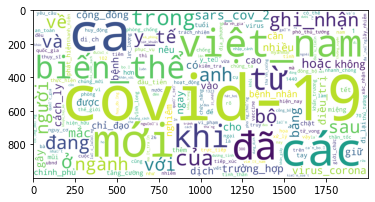

In [19]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from wordcloud import WordCloud
background_color = "#FFFFFF"
height = 1000
width = 2000
words = []
def split_pos(df,words,index):
  x = df["words"][index]
  y = x.split()
  for i in range(len(y)):
    words.append(y[i])
  return words

for i in range(35):
  split_pos(df,words,i)

data = dict()
for word in words:
    word = word.lower()
    data[word] = data.get(word, 0) + 1

word_cloud = WordCloud(
    background_color=background_color,
    width=width,
    height=height
)

word_cloud.generate_from_frequencies(data)
word_cloud.to_file('image.png')
plt.imshow(mpimg.imread('image.png'))


In [20]:
gold_data = [[('Việt_Nam', 'Np'),('đang', 'R'),('thực_hiện', 'V'),('tốt', 'A'),('công_tác', 'N'),('phòng_chống', 'V'),('dịch', 'N')],
             [('Việt_Nam', 'Np'),('sẽ', 'R'),('hạn_chế', 'V'),('số', 'N'),('ca', 'N'),('Covid-19', 'Np'),('ở', 'E'),('mức', 'N'),('thấp', 'A'),('nhất', 'M')],
             [('thủ_tướng', 'N'),('yêu_cầu', 'V'),('làm', 'V'),('rõ', 'A'),('trách_nhiệm', 'N'),('việc', 'N'),('để', 'E'),('lây_nhiễm', 'V'),('Covid-19', 'Np'),('ra', 'V'),('cộng_đồng', 'N')],
             [('không', 'R'),('đeo', 'V'),('khẩu_trang', 'N'),('nơi', 'N'),('công_cộng', 'A'),('có_thể', 'R'),('bị', 'V'),('phát', 'V'),('đến', 'V'),('6', 'M'),('triệu', 'M'),('đồng', 'N')]
             ]

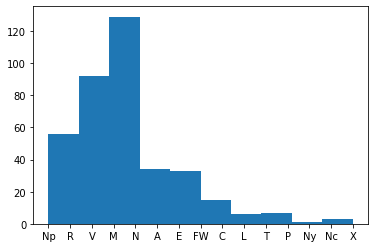

In [21]:
import matplotlib.pyplot as plt
word_count = []
def split_pos(df,word_count,index):
  x = df["pos"][index]
  y = x.split()
  for i in range(len(y)):
    word_count.append(y[i])
  return word_count

for i in range(35):
  split_pos(df,word_count,i)

plt.hist(word_count, bins=10)
plt.show()

# **GÁN NHÃN TỪ LOẠI (PART-OF-SPEECH Tagging)**
---



# **Học từ dữ liệu đã được gán nhãn**
---
Sử dụng mô hình **Hidden Markov Model** với phương pháp smoothing là **Laplace**.:


In [22]:
from nltk.tag.hmm import HiddenMarkovModelTrainer
from nltk.probability import LaplaceProbDist
trainer = HiddenMarkovModelTrainer()
tagger = trainer.train_supervised(DATA,estimator=LaplaceProbDist)

# **Đánh giá**
---
Sử dụng độ chính xác **(Accuracy)** bằng công thức:<br>
$Acc = \frac{n}{N}$<br>
- $n$ là số lượng nhãn dự đoán đúng
- $N$ là tổng số lượng nhãn (tương ứng với số lượng
từ) trong ngữ liệu Gold.<br>

In [23]:
INPUT = ["Việt_Nam đang thực_hiện tốt công_tác phòng_chống dịch",
         "Việt_Nam sẽ hạn_chế số ca Covid-19 ở mức thấp nhất",
         "thủ_tướng yêu_cầu làm rõ trách_nhiệm việc để lây_nhiễm Covid-19 ra cộng_đồng",
         "không đeo khẩu_trang nơi công_cộng có_thể bị phát đến 6 triệu đồng"
         ]
def danh_gia(INPUT,index):
  pos =tagger.tag(INPUT.split())

  count = 0
  for i in range(len(pos)):
    if pos[i][1] == gold_data[index][i][1]:
      count += 1
  print("Gold           :",gold_data[index])
  print("Kết quả dự đoán:",pos)
  print("Accuracy       : {:0.2f}".format((count/len(pos))*100), "%")

for i in range(len(gold_data)):
  danh_gia(INPUT[i],i)

Gold           : [('Việt_Nam', 'Np'), ('đang', 'R'), ('thực_hiện', 'V'), ('tốt', 'A'), ('công_tác', 'N'), ('phòng_chống', 'V'), ('dịch', 'N')]
Kết quả dự đoán: [('Việt_Nam', 'Np'), ('đang', 'R'), ('thực_hiện', 'V'), ('tốt', 'N'), ('công_tác', 'N'), ('phòng_chống', 'V'), ('dịch', 'N')]
Accuracy       : 85.71 %
Gold           : [('Việt_Nam', 'Np'), ('sẽ', 'R'), ('hạn_chế', 'V'), ('số', 'N'), ('ca', 'N'), ('Covid-19', 'Np'), ('ở', 'E'), ('mức', 'N'), ('thấp', 'A'), ('nhất', 'M')]
Kết quả dự đoán: [('Việt_Nam', 'Np'), ('sẽ', 'E'), ('hạn_chế', 'N'), ('số', 'V'), ('ca', 'N'), ('Covid-19', 'Np'), ('ở', 'E'), ('mức', 'N'), ('thấp', 'V'), ('nhất', 'N')]
Accuracy       : 50.00 %
Gold           : [('thủ_tướng', 'N'), ('yêu_cầu', 'V'), ('làm', 'V'), ('rõ', 'A'), ('trách_nhiệm', 'N'), ('việc', 'N'), ('để', 'E'), ('lây_nhiễm', 'V'), ('Covid-19', 'Np'), ('ra', 'V'), ('cộng_đồng', 'N')]
Kết quả dự đoán: [('thủ_tướng', 'N'), ('yêu_cầu', 'V'), ('làm', 'N'), ('rõ', 'V'), ('trách_nhiệm', 'N'), ('việc', 'N